# Introduction

This preject will use classification to prediction who are likely to churn (leave our services) from a Telco services.

data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [238]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [239]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data preparation

In [240]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [241]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [242]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [243]:
# totalcharges is not numeric so we are going to convert it

df.totalcharges = pd.to_numeric(df.totalcharges, errors ="coerce")

In [244]:
df.totalcharges = df.totalcharges.fillna(0)

In [245]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [246]:
# chrun to 0/1

df.churn = (df.churn == "yes").astype(int)

In [247]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

# Set up val framwork

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [250]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [251]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)

In [252]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [253]:
df_full_train = df_full_train.reset_index(drop=True)

In [254]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [255]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [256]:
global_chrun_rate = df_full_train.churn.mean()

In [257]:
round(global_chrun_rate, 2)

0.27

In [258]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [259]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [260]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod']

In [261]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature impoartance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable

* Churn rate
* Risk ratio
* Mutual information - later

In [262]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [263]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

Both gender churn rate are similar to global. 

In [264]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [265]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

Partner seems to be more related to churn risk. 

In [266]:
churn_no_partner / global_chrun_rate

1.2216593879412643

In [267]:
churn_partner / global_chrun_rate

0.7594724924338315

Particularly, people without partners is about 12% more likely to churn than thoes with partners. 

In [268]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['dff'] = df_group['mean']-global_chrun_rate
    df_group['risk'] = df_group['mean']/global_chrun_rate
    display(df_group)
    print(c)
    print()

,mean,count,dff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


gender



,mean,count,dff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


seniorcitizen



,mean,count,dff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


partner



,mean,count,dff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


dependents



,mean,count,dff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


phoneservice



,mean,count,dff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


multiplelines



,mean,count,dff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


internetservice



,mean,count,dff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinesecurity



,mean,count,dff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


onlinebackup



,mean,count,dff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


deviceprotection



,mean,count,dff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


techsupport



,mean,count,dff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingtv



,mean,count,dff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


streamingmovies



,mean,count,dff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


contract



,mean,count,dff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paperlessbilling



,mean,count,dff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


paymentmethod



# Feature importance: Mutual infomation

Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another

In [269]:
from sklearn.metrics import mutual_info_score

In [270]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [271]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [272]:
mi =df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

contract, onlinesecuritt, techsupport, internetservice, onlinebackup, deviceprotection, paymentmethod are the valuables that have high mutual imfomation score and what ML will pick up learning the most. 

# Feature Importance: Correlation

In [273]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

The longer the customer had stayed, the less likely they were to churn, and this valuale has the highest correlation that the other two numerical variables. The more the amount of money they paid, the less likely they were to churn, while if the monthly charges is high, then they are likly to churn. 

In [274]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [275]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()


0.3994413407821229

In [276]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [277]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()


0.08795411089866156

In [278]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()


0.18340943683409436

In [279]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()


0.32499341585462205

# One-hot encoding

Use Skcikit-learn to encode categorical features.

In [280]:
from sklearn.feature_extraction import DictVectorizer

#DictVectorizer encodes the value of each recordsto 0/1 for categoricals and retain numerical values. 

In [314]:
dicts_train = df_train[categorical+numerical].to_dict(orient = "records")

In [292]:
dv = DictVectorizer(sparse = False)

In [315]:
X_train = dv.fit_transform(dicts_train)

In [294]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict) # no fitting to val 

In [300]:
dv.get_feature_names_out() # recent sklearn change the function to this name. 

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [301]:
X_train

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]])

In [302]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

# Logistic Regression

Using sigmoid function to a linear regression model makes the output between 0~1.
Specifically, for positive input, the output will prone to 1 and vice versa. 

In [303]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [304]:
z = np.linspace(-5, 5, 51)

In [305]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

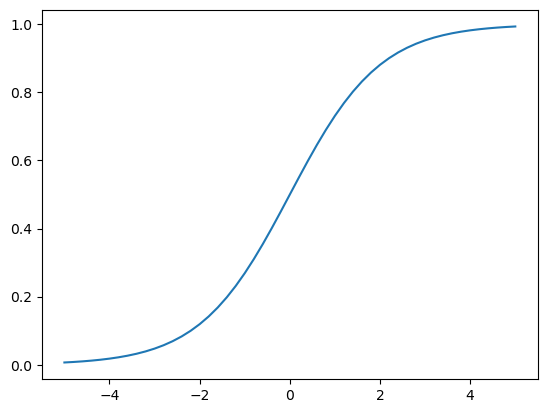

In [306]:
plt.plot(z, sigmoid(z))

In [307]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j]*w[j]
        
    result = sigmoid(score)
    return result    

# Train logistic regression

In [309]:
from sklearn.linear_model import LogisticRegression


In [321]:
model = LogisticRegression()

In [324]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

In [325]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [331]:
y_pred = model.predict_proba(X_val)[:,1]

In [334]:
churn_decision = y_pred >= 0.5

In [335]:
df_val[churn_decision].customerid #customers we should send retention strategy to

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 314, dtype: object

In [337]:
# how accurate is the model predictions
(y_val == churn_decision).mean()

0.8041163946061036

80% of the validation data is predicted correctly. Not bad :)

# Model Interpretation

In [343]:
# let's look at how each feature weighted in the prediction
# since we use the Pipeline method, we need to specifier which step we want to acess the coefficient from.

dict(zip(dv.get_feature_names_out(),model.named_steps['classifier'].coef_[0].round(3)))

{'contract=month-to-month': 0.303,
 'contract=one_year': -0.021,
 'contract=two_year': -0.334,
 'dependents=no': 0.016,
 'dependents=yes': -0.016,
 'deviceprotection=no': 0.041,
 'deviceprotection=no_internet_service': -0.09,
 'deviceprotection=yes': 0.036,
 'gender=female': 0.01,
 'gender=male': -0.01,
 'internetservice=dsl': -0.282,
 'internetservice=fiber_optic': 0.344,
 'internetservice=no': -0.09,
 'monthlycharges': -0.623,
 'multiplelines=no': -0.093,
 'multiplelines=no_phone_service': 0.009,
 'multiplelines=yes': 0.088,
 'onlinebackup=no': 0.043,
 'onlinebackup=no_internet_service': -0.09,
 'onlinebackup=yes': 0.034,
 'onlinesecurity=no': 0.119,
 'onlinesecurity=no_internet_service': -0.09,
 'onlinesecurity=yes': -0.05,
 'paperlessbilling=no': -0.089,
 'paperlessbilling=yes': 0.089,
 'partner=no': -0.031,
 'partner=yes': 0.031,
 'paymentmethod=bank_transfer_(automatic)': -0.03,
 'paymentmethod=credit_card_(automatic)': -0.009,
 'paymentmethod=electronic_check': 0.042,
 'paymentm

Although the features are extensive, with a closer look, we can see that only "contract", "tenure", "monthlycharges" and "totalcharges" are the ones have the influential weights to the prediction. 

# Use the model

In [344]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [345]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [347]:
y_full_train = df_full_train.churn.values

In [348]:
model = LogisticRegression()
model.fit(X_full_train,y_full_train) 
# to adhere to the zoomcamp, this time I didn't use a scaler.

/Users/litingliu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [349]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [351]:
X_test = dv.transform(dicts_test)

In [352]:
y_pred = model.predict_proba(X_test)[:,1]

In [353]:
churn_decision = (y_pred >= 0.5)

In [354]:
(churn_decision == y_test).mean()

0.8140525195173882

The model perform slightly better on the test dataset by 1%. 

Let's try this model to a customer by using a smaller version of the model which only includes features that have influencial weights on the prediction.

In [355]:
small = ["contract", "tenure", "monthlycharges", 'totalcharges' ]

In [360]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [362]:
dv_small = DictVectorizer(sparse=False)
X_train_small = dv_small.fit_transform(dicts_train_small)

In [364]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

/Users/litingliu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [366]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'contract=month-to-month': 0.36,
 'contract=one_year': -0.692,
 'contract=two_year': -1.309,
 'monthlycharges': 0.025,
 'tenure': -0.055,
 'totalcharges': 0.0}

In [368]:
customer = dicts_test[-1]

In [385]:
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [386]:
X_small = dv_small.transform([customer])

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0420e+02, 1.7000e+01,
        1.7435e+03]])

In [374]:
model_small.predict_proba(X_small)[0,1]

0.6710028237821957

In [376]:
y_test[-1]

1

As we use the small version of the model to test on one customer, the model accurately predict this customer is going to leave the service. With a closer look to the profile, the churn reason probably is that she is a short tenured customer on a month-to-month contract. To retention this type of customer, we either promote discount on continuing the contract or longer contracts. Since she also have streaing services, perhaps promotion on contract continual would be more attractive than longer contracts. 